In [1]:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib qt

import numpy as np
from numpy import *
from scipy.fft import fft, ifft, fftshift, ifftshift
from scipy.optimize import curve_fit

import os
import scipy.io as sio

def linear_func(x, a, b):
    return a * x + b

def linear_fit(x, y):
    popt, pcov = curve_fit(linear_func, x, y)
    a = popt[0]
    b = popt[1]
    return a, b

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_6'

folders = os.listdir(initial_folder)
for i in range(len(folders)):
    if ".fig" in folders[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', folders[i])

[0] -----------> 1st_tone
[1] -----------> Noise_sweep2025-04-09-10-56-15.mat
[2] -----------> Noise_sweep_180mK_faster_till_mid2025-04-22-14-58-48.mat
[3] -----------> Noise_sweep_200mK2025-04-17-22-00-04.mat
[4] -----------> Noise_sweep_200mK_faster2025-04-19-20-58-55.mat
[5] -----------> Noise_sweep_500mK2025-04-23-17-25-08.mat
[6] -----------> Noise_sweep_best_gain2025-04-14-12-19-40.mat
[7] -----------> Noise_sweep_best_gain2025-04-14-13-47-39.mat
[8] -----------> Noise_sweep_best_gain2025-04-17-18-38-55.mat
[9] -----------> Rough_gain_sweep2025-04-08-12-22-07.mat
[10] -----------> Rough_gain_sweep_500mK2025-04-23-12-02-26.mat
[11] -----------> Rough_gain_sweep_500mK2025-04-23-13-23-42.mat
[12] -----------> Rough_gain_sweep_high_temp2025-04-16-12-58-23.mat


In [3]:
file = folders[2]
mat = sio.loadmat(initial_folder+"\\"+file)
print(mat.keys(), '\n')

data_gain = mat['data_gain']
print(data_gain.shape)
volts = mat['volts'][0]
print('DC:', volts.shape)
pump_freqs = mat['pump_freqs'][0]
print('pf:', pump_freqs.shape)
pump_powers = mat['pump_powers'][0]
print('pp', pump_powers.shape)
fft_freq = mat['fft_freq'][0]
print('fft_freq:', fft_freq.shape)


data_mag = mat['data_mag'] # on/off
print(data_mag.shape)
data_pha = mat['data_pha'] # on/off
print(data_pha.shape)


dict_keys(['__header__', '__version__', '__globals__', 'pump_powers', 'pump_freqs', 'volts', 'data_gain', 'data_mag', 'data_pha', 'fft_freq']) 

(4, 71, 10)
DC: (4,)
pf: (71,)
pp (10,)
fft_freq: (101,)
(4, 71, 10, 2, 101)
(4, 71, 10, 2, 101)


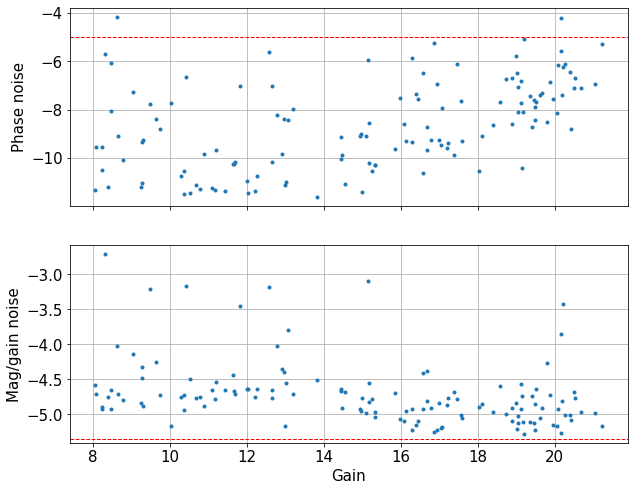

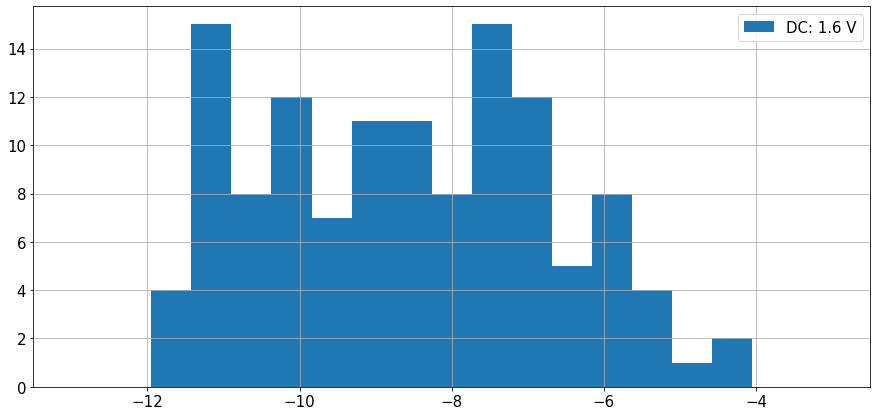

In [4]:
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(2, 1, figsize=(10,8), sharex=True)

fig2, ax2 = plt.subplots(1, 1, figsize=(15,7))
ax2.grid(True)
bin_edges = np.linspace(-13, -3, 20)



hz1_idx = 60

gain_arr = np.array([])
mag_1hz_arr = np.array([])
mag_1hz_arr_ref = np.array([])

pha_1hz_arr = np.array([])
pha_1hz_arr_ref = np.array([])

  
for dc_idx in range(len(volts)):
    pha_1hz_arr_DC = np.array([])
    for pf_idx in range(len(pump_freqs)):
        for pp_idx in range(len(pump_powers)):


            selected_gain_point = data_gain[dc_idx, pf_idx, pp_idx]
            selected_mag_point = data_mag[dc_idx, pf_idx, pp_idx]
            selected_pha_point = data_pha[dc_idx, pf_idx, pp_idx]

            if selected_mag_point[0,hz1_idx] != 0: 
                gain_arr = np.append(gain_arr, selected_gain_point)
                
                x = fft_freq[51:]
                y = selected_mag_point[0,51:]/np.power(10, selected_gain_point/10)
                am, bm = linear_fit(np.log10(x[:-30]), np.log10(y[:-30]))
                mag_1hz_arr = np.append(mag_1hz_arr, np.power(10, linear_func(np.log10(1), am, bm)))
                
                y = selected_pha_point[0,51:]
                ap, bp = linear_fit(np.log10(x[:-30]), np.log(y[:-30]))
                pha_1hz_arr = np.append(pha_1hz_arr, np.power(10, linear_func(np.log10(1), ap, bp)))
                pha_1hz_arr_DC = np.append(pha_1hz_arr_DC, np.power(10, linear_func(np.log10(1), ap, bp)))
                
                
                y = selected_mag_point[1,51:]
                am, bm = linear_fit(np.log10(x[:-30]), np.log10(y[:-30]))
                mag_1hz_arr_ref = np.append(mag_1hz_arr_ref, np.power(10, linear_func(np.log10(1), am, bm)))
                
                y = selected_pha_point[1,51:]
                ap, bp = linear_fit(np.log10(x[:-30]), np.log(y[:-30]))
                pha_1hz_arr_ref = np.append(pha_1hz_arr_ref, np.power(10, linear_func(np.log10(1), ap, bp)))


                
    
    if len(pha_1hz_arr_DC)>10:
        ax2.hist(np.log10(pha_1hz_arr_DC), bins=bin_edges, alpha=1, label=r'DC: {} V'.format(np.round(volts[dc_idx],2)))

                



ax[0].plot(gain_arr, np.log10(pha_1hz_arr), '.', label = 'All points')

ax[1].plot(gain_arr, np.log10(mag_1hz_arr), '.', label = 'All points')

ax[0].axhline(y=-5, color='r', linestyle='--', linewidth=1)
ax[1].axhline(y=-5.35, color='r', linestyle='--', linewidth=1)

# ax[0].set_ylim(-6,-2)
# ax[1].set_ylim(-6,-2)

ax[0].set_ylabel('Phase noise')

ax[1].set_xlabel('Gain')
ax[1].set_ylabel('Mag/gain noise')

ax[0].grid()
ax[1].grid()

# ax[0].legend(loc = 0)
ax2.legend()
# ax[1].legend(loc = 0)

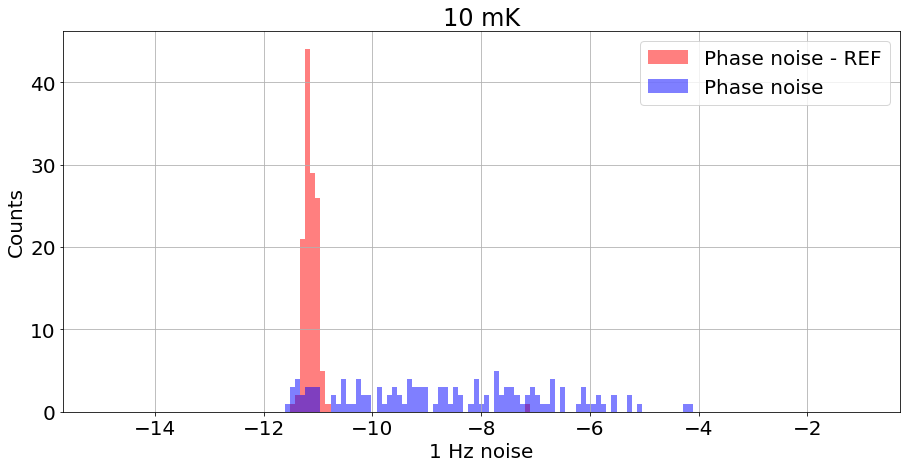

In [146]:
font = {'size'   : 20}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.set_title("10 mK")
ax.set_ylabel("Counts")
ax.set_xlabel("1 Hz noise")


bin_edges = np.linspace(-15, -1, 150)

# ax.hist(np.log10(pha_1hz_arr)/np.log10(pha_1hz_arr_ref), bins=bin_edges, alpha=0.5, label='Phase noise/REF', color='blue')
ax.hist(np.log10(pha_1hz_arr_ref), bins=bin_edges, alpha=0.5, label='Phase noise - REF', color='red')
ax.hist(np.log10(pha_1hz_arr), bins=bin_edges, alpha=0.5, label='Phase noise', color='blue')


ax.legend()
ax.grid(True)

2.67219


2.67219

C:\Users\Demag\anaconda3\lib\site-packages\matplotlib_inline\backend_inline.py:234: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


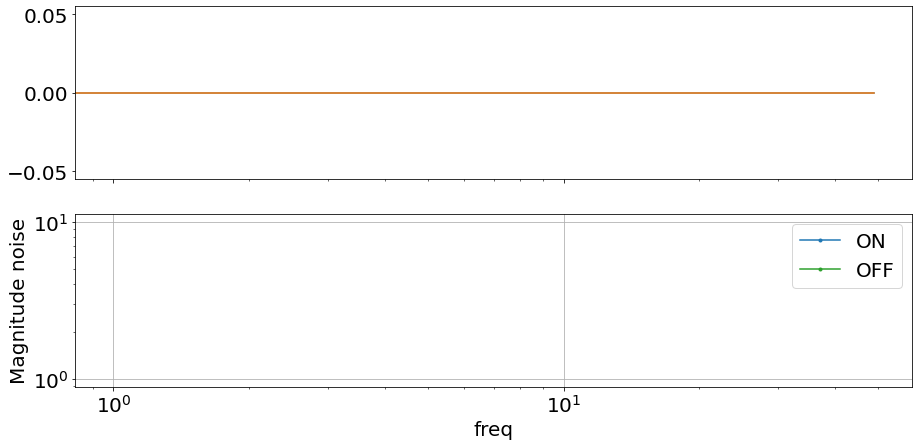

In [104]:
dc_idx = 2
pp_idx = 11
pf_idx = 7

hz1_idx = 10

selected_gain_point = data_gain[dc_idx, pp_idx, pf_idx]
selected_pha_point = data_pha[dc_idx, pp_idx, pf_idx]
print(selected_gain_point)

font = {'size'   : 20}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(2, 1, figsize = (15, 7), sharex = True)
ax[1].grid()
ax[1].set_xlabel('freq')
ax[1].set_ylabel('Magnitude noise')

ax[0].plot(selected_pha_point[0,51:])
ax[0].plot(selected_pha_point[1,51:])

ax[1].loglog(fft_freq[51:], selected_pha_point[0,51:], '.-', label = 'ON')

ax[1].loglog(fft_freq[hz1_idx], selected_pha_point[0,hz1_idx], '.')

ax[1].loglog(fft_freq[51:], selected_pha_point[1,51:], '.-', label = 'OFF')
ax[1].legend()

data_gain[dc_idx, pp_idx, pf_idx]
